In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("telecom_churn.csv")
#telecom custoer defection analysis
#customer churn means customer defection means is the loss of clients or customer 

In [3]:
#check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
#check inormation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#display all rows
pd.set_option('display.max_rows',None)

In [6]:
#display all columns
pd.set_option('display.max_columns',None)

In [7]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
19.55       7
45.3        7
20.15       6
20.25       6
19.45       6
20.45       5
20.3        5
44          4
19.5        4
19.4        4
19.95       4
20.4        4
70.6        4
19.2        4
69.9        4
69.6        4
44.4        4
74.7        4
69.95       4
49.9        4
19.3        4
19.85       4
75.3        4
20.5        4
20.35       4
69.65       4
50.15       4
35.9        3
19.1        3
20.55       3
24.8        3
69.1        3
24.4        3
69.25       3
383.65      3
45.85       3
70.45       3
70.15       3
74.35       3
86.05       3
85.5        3
20.1        3
84.5        3
470.2       3
50.75       3
79.55       3
25.25       3
20          3
69.55       3
74.9        3
74.6        3
1284.2      3
75.35       3
85          3
2317.1      3
44.75       3
45.7        3
220.45      3
45.1        3
74.3        3
20.9        3
50.6        3
55.7        3
70.3        3
80.55       3
70.1  

In [8]:
#replace space (' ') value in TotalCharges by null value
df["TotalCharges"].replace(' ',np.nan,inplace=True)

In [9]:
#change categorical data (object) into numeric (float)
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [11]:
#as TotalCharges have null value fill the TotalCharges with mean value
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [12]:
#predict churn : this is the output variable no means not leaving service yes means leaving

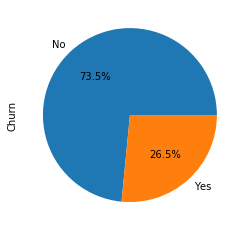

In [13]:
#representing the churn with pie graph to count the value of yes and no in percentage
df["Churn"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

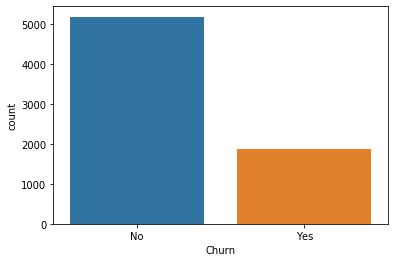

In [14]:
#or using count plot 
sns.countplot(data=df,x="Churn")
plt.show()

In [15]:
#customer id is not that important to predict the value or (in doing data analysis)
#so remove the field customer id
df.drop("customerID",axis=1,inplace=True)

In [16]:
#seperate the object type data 
df_cat=df.select_dtypes("object")

In [17]:
#seperate the numeric type data
df_num=df.select_dtypes(["float64","int64"])

In [18]:
#call class for label encoder
from sklearn.preprocessing import LabelEncoder

In [19]:
#create object o label encoder
le=LabelEncoder()

In [20]:
#change the object type data into numeric type by using for loop
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [21]:
#to check if it is converted into numeric
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [22]:
#merge the object type and numeric type data
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
#train the model with the help of classification algorithm because we have datset in classified form(yes/no)

In [24]:
#seperate the independent (input X) and dependent (output Y) variable
X=df_new.drop("Churn",axis=1)
Y=df_new["Churn"]

In [25]:
#call class for training and testing
from sklearn.model_selection import train_test_split

In [26]:
#split data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [27]:
#create function which will be used for training and testing 

In [28]:
#create a function
def create_model(model):
    model.fit(X_train,Y_train)#to train
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    return model

In [29]:
#as we have used classification report we hhave to call the class for it
from sklearn.metrics import classification_report

# BASELINE MODEL USING LOGISTIC REGRESSION

# 1st Algotithm
 LOGISTIC CLASSIFICATION

In [30]:
#call class for logistic regression
from sklearn.linear_model import LogisticRegression

In [31]:
#create object for LogisticRegression class
lr=LogisticRegression()

In [32]:
#call the function "create_model"(for training and testing)
create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



LogisticRegression()

In [33]:
#here we have not applied data analysis, so because of this model is getting overfit
#we will use DecisionTreeClassifier as it will select the important features

# 2nd Algorithm
 DECISION TREE

In [34]:
#call the class for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [36]:
#call function "create_model"(for training and testing)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1585
           1       0.48      0.51      0.49       528

    accuracy                           0.74      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.74      0.74      0.74      2113



In [37]:
#to check the information gain (if information gain is high then the column will be important for making tree)
dt.feature_importances_

array([0.01739737, 0.12733944, 0.19900261, 0.20381107, 0.03388877,
       0.02652784, 0.01097571, 0.00064418, 0.02096828, 0.01020826,
       0.04510724, 0.02210253, 0.01775633, 0.02001609, 0.0076292 ,
       0.00949803, 0.16146337, 0.01775759, 0.0479061 ])

In [38]:
#call the class for tree
from sklearn import tree

In [39]:
#keep all the input variables in features
features=X.columns

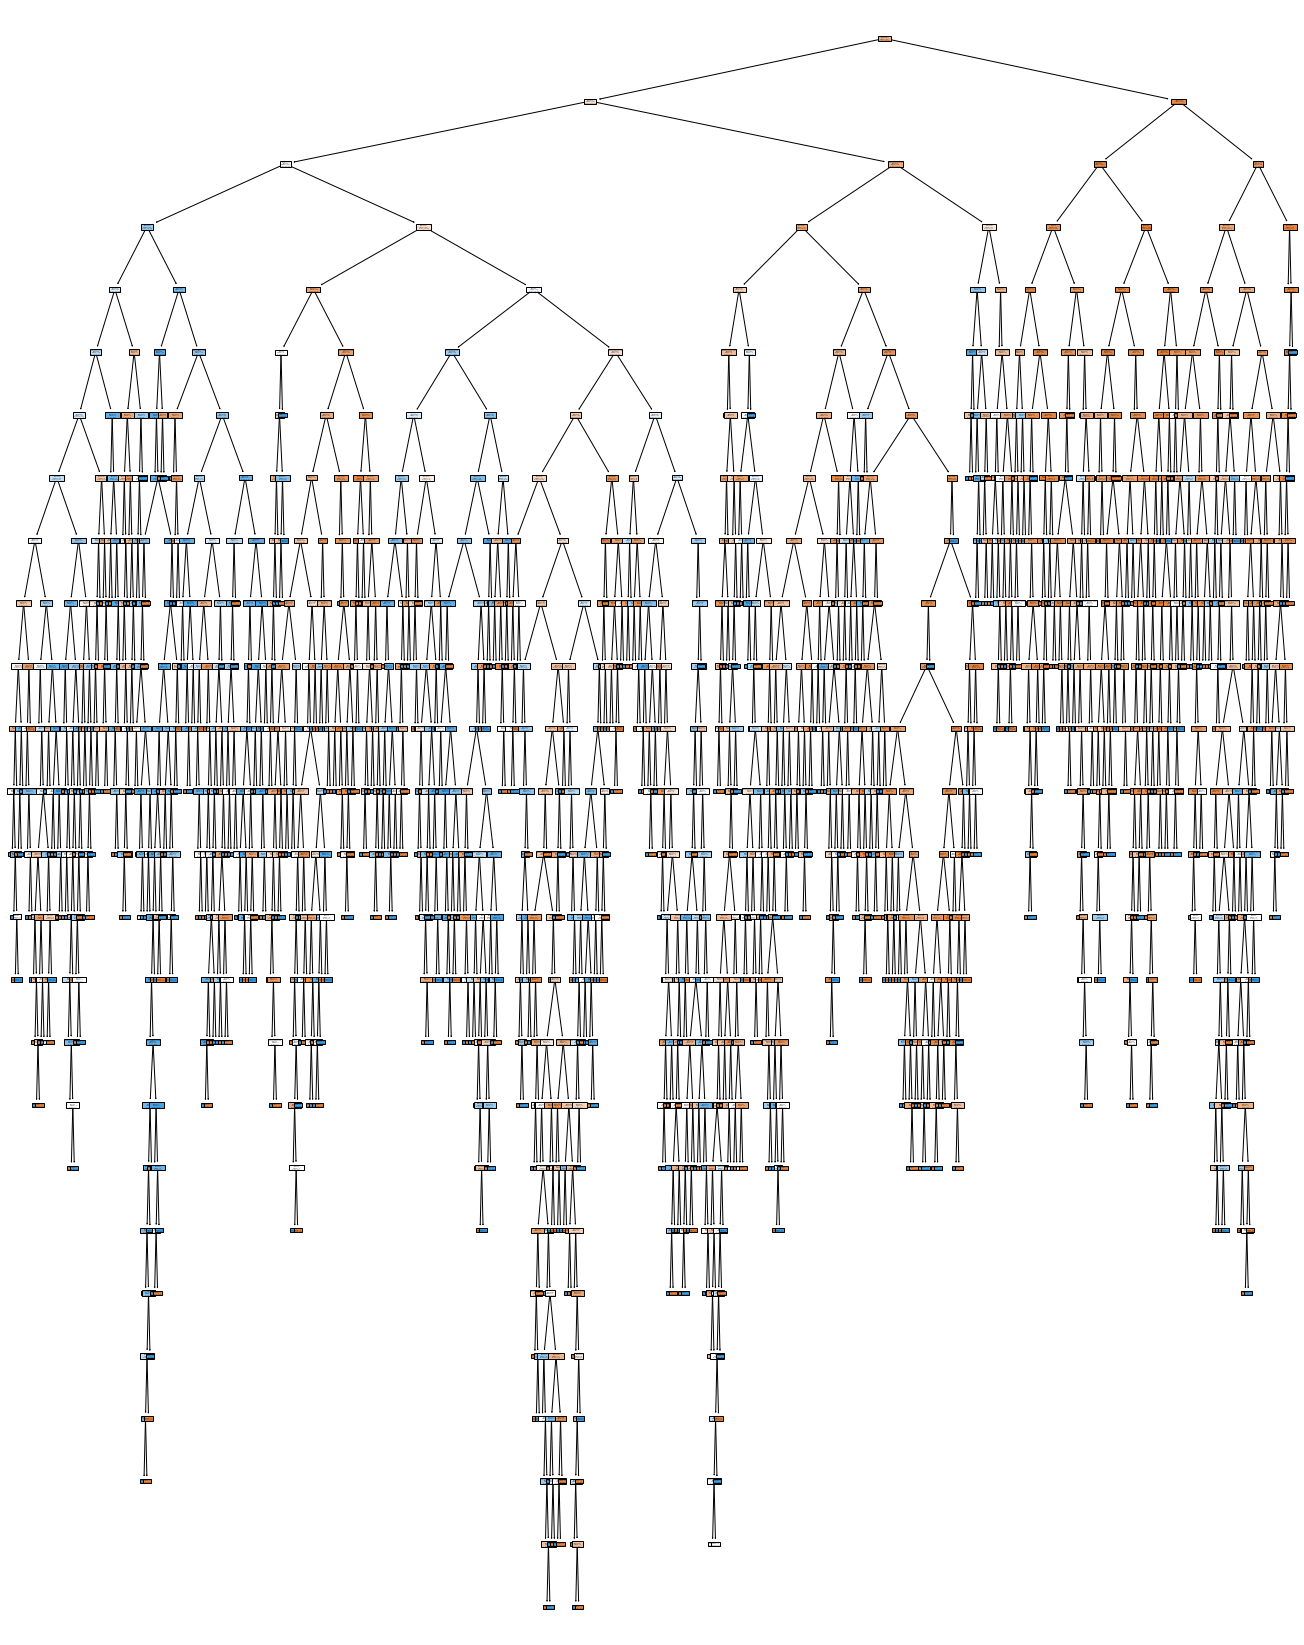

In [40]:
#draw the tree
fig=plt.figure(figsize=(23,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [41]:
#here the recall is not that good and each column has some information gain so the model is getting overfit
#so we will apply all the purning technique

In [42]:
#(1) max_depth 
#we create a different object of DecisionTreeClasiifier and pass parameter for max_depth
dt1=DecisionTreeClassifier(max_depth=2) #not mpore than 8

In [43]:
#call function "create_model"(for training and testing)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1585
           1       0.50      0.75      0.60       528

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.75      0.77      2113



In [44]:
#it is giving good recall when the max_depth is 2

In [45]:
##to check the information gain (if information gain is high then the column will be important for making the tree)
dt1.feature_importances_

array([0.        , 0.        , 0.02956213, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.19101367, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.77942421, 0.        , 0.        ])

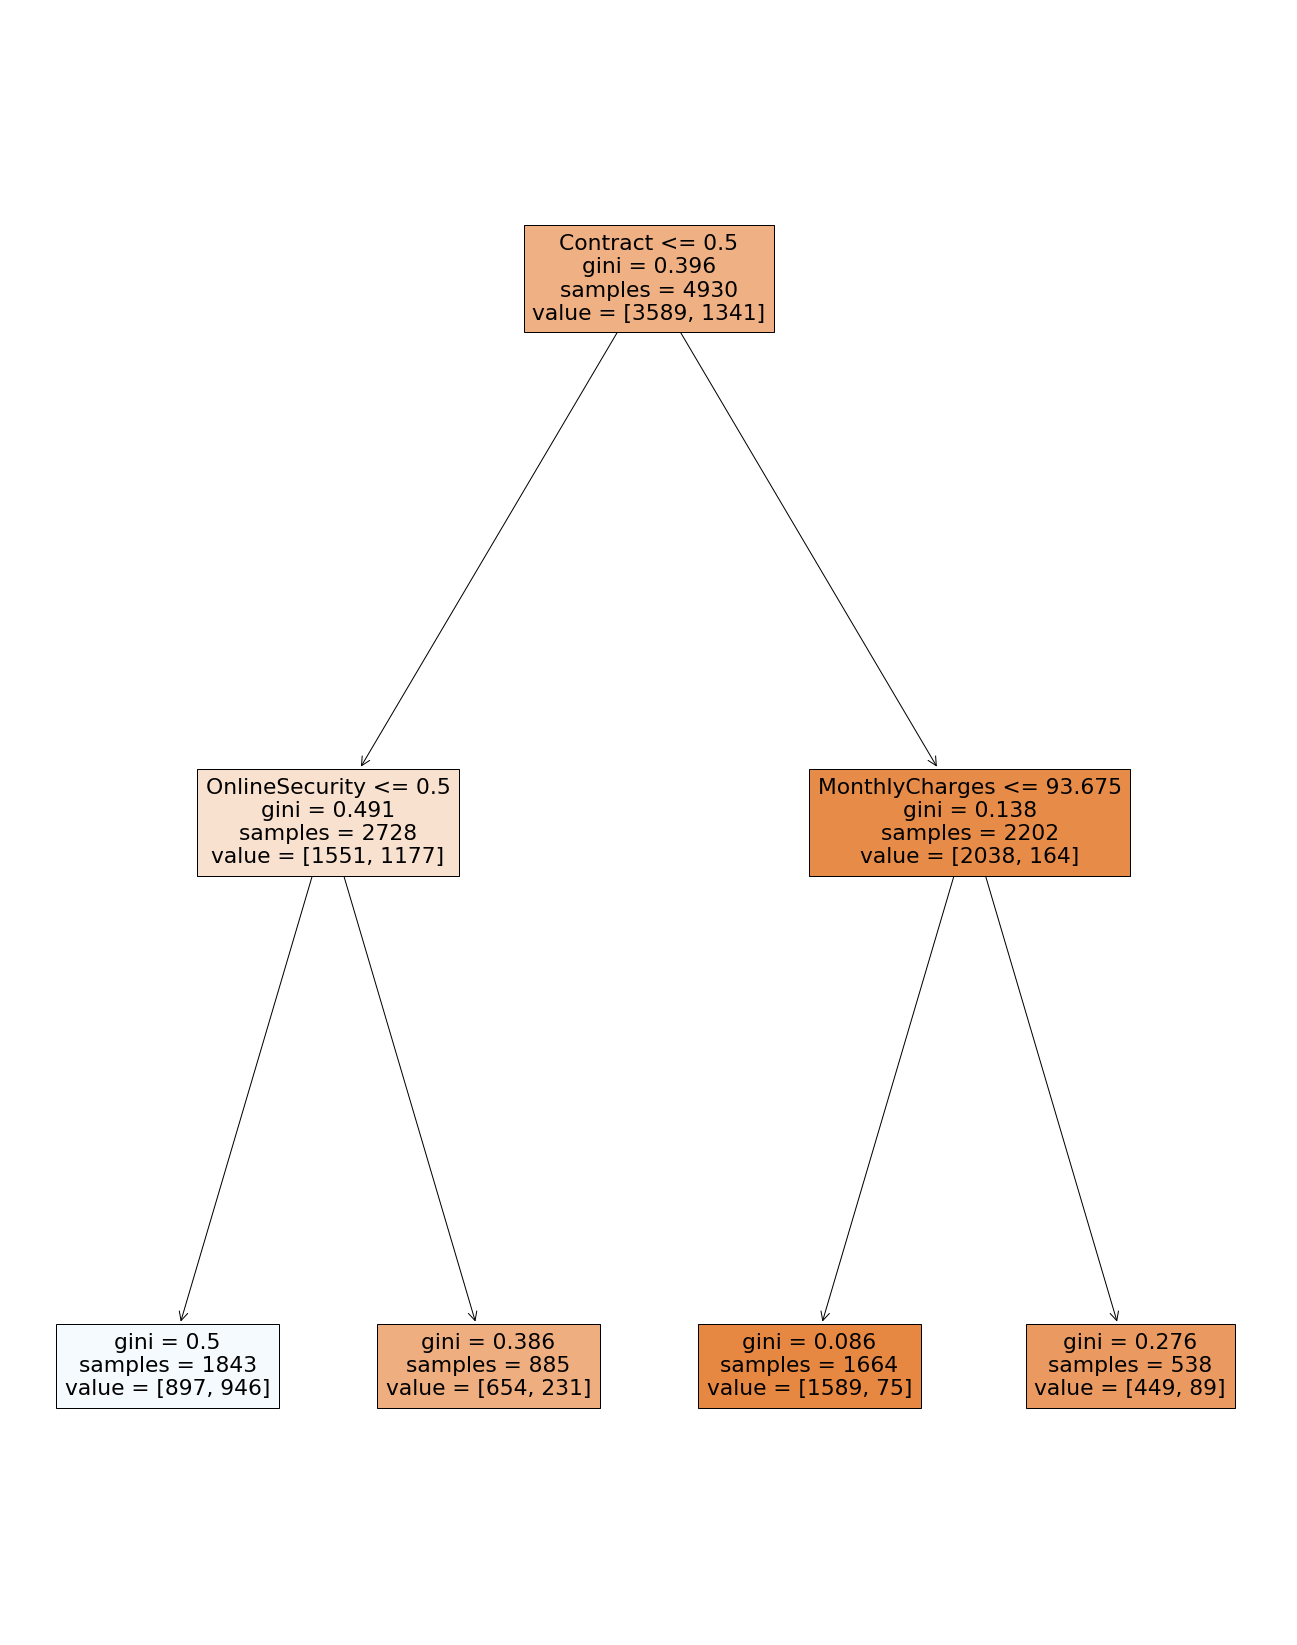

In [46]:
#draw the tree
fig=plt.figure(figsize=(23,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [47]:
#(2) min_sample_leaf
#we create a different object of DecisionTreeClasiifier and pass parameter for min_sample_leaf
dt2=DecisionTreeClassifier(min_samples_leaf=45) #min 50

In [48]:
#call function "create_model"(for training and testing)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.63      0.53      0.58       528

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.80      0.80      0.80      2113



In [49]:
#it is not giving nice recall that is the model is getting overfit
#so the max-depth is the best technique for training as it is giving good recall

In [50]:
#but recall is not still that good so we will apply next algorithm

# 3rd Algorithm
SUPPORT VECTOR MACHINE

In [51]:
#call class form svm
from sklearn.svm import LinearSVC

In [52]:
#(1) Linear kernel (if suppose data is dsitributed lineraly)

In [59]:
#create object for LinearSVC
svc=LinearSVC(random_state=1,C=0.05) #c is paramete for adding error

In [60]:
#call function "create_model"(for training and testing)
create_model(svc)

              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1585
           1       0.42      0.85      0.56       528

    accuracy                           0.66      2113
   macro avg       0.67      0.72      0.64      2113
weighted avg       0.80      0.66      0.69      2113



LinearSVC(C=0.05, random_state=1)

# Ensembling Technique

In [55]:
#(1) RandomForestTree

In [56]:
#call class for RandomForestTree
from sklearn.ensemble import RandomForestClassifier

In [57]:
#create object of RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [58]:
#call function"create_model"(for training and testing)
create_model(rf)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1585
           1       0.63      0.50      0.56       528

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



RandomForestClassifier(max_features=10, n_estimators=10, random_state=1)